In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from PIL import Image
%matplotlib inline

In [18]:
def load_image(f, mode="RGB"):
    img = Image.open(f)
    img = img.convert(mode)
    return img

In [15]:
def combine_image(label_img, sat_img, alpha=96):
    """
    combine 2 images.
    """
    assert label_img.mode == "RGBA"
    label_arr = np.array(label_img)
    # black pixels
    black = label_arr[:,:, 0] + label_arr[:,:, 1] + label_arr[:,:, 2] == 0
    # set 0 alpha for all black pixels
    label_arr[black, 3] = 0
    # else set 'alpha'
    label_arr[np.logical_not(black), 3] = alpha
    label_img = Image.fromarray(label_arr, "RGBA")
    # combine
    combined_img = sat_img.copy()
    combined_img.paste(label_img, (0, 0), label_img)
    return combined_img

In [16]:
def plot_images(images):
    """
    show images in a grid.
    """
    coords = itertools.product(range(0, 3), range(0, 3))
    f, axarr = plt.subplots(3, 3, figsize=(16, 16))

    for img in images:
        x, y = next(coords)
        axarr[x, y].imshow(np.asarray(img))

# Samples

In [19]:
images_dir = "../../skynet-data/data/images/"
labels_dir = "../../skynet-data/data/labels/color/"

# for i in $(ls -alh -S |grep png |head -9 |awk '{print $9}') ;do 
#   echo \"$(echo $i |sed 's/\.png//')\"
# done |tr '\n' ','
files = ["17-65473-43663","17-65438-43528","17-65444-43528",
         "17-65443-43528","17-65475-43661","17-65446-43526",
         "17-65501-43588","17-65475-43658","17-65438-43527"]
images = [load_image(images_dir + x + ".jpg") for x in files]

## Some images

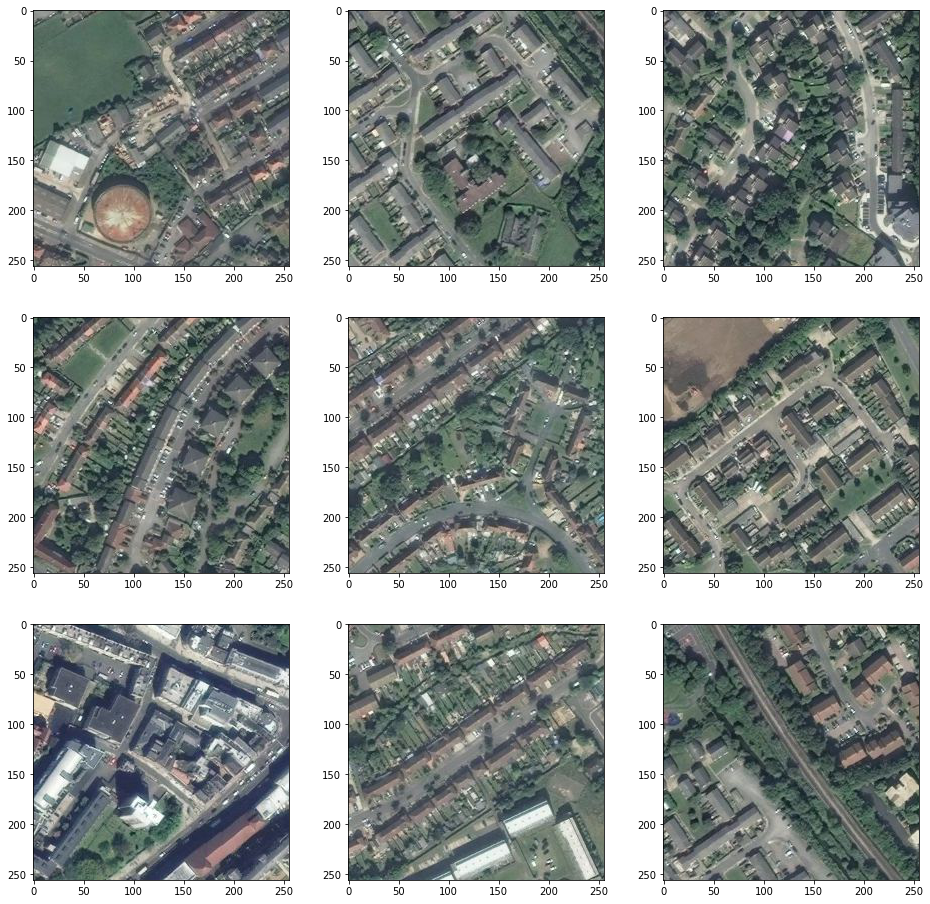

In [20]:
plot_images(images)

## Some labels

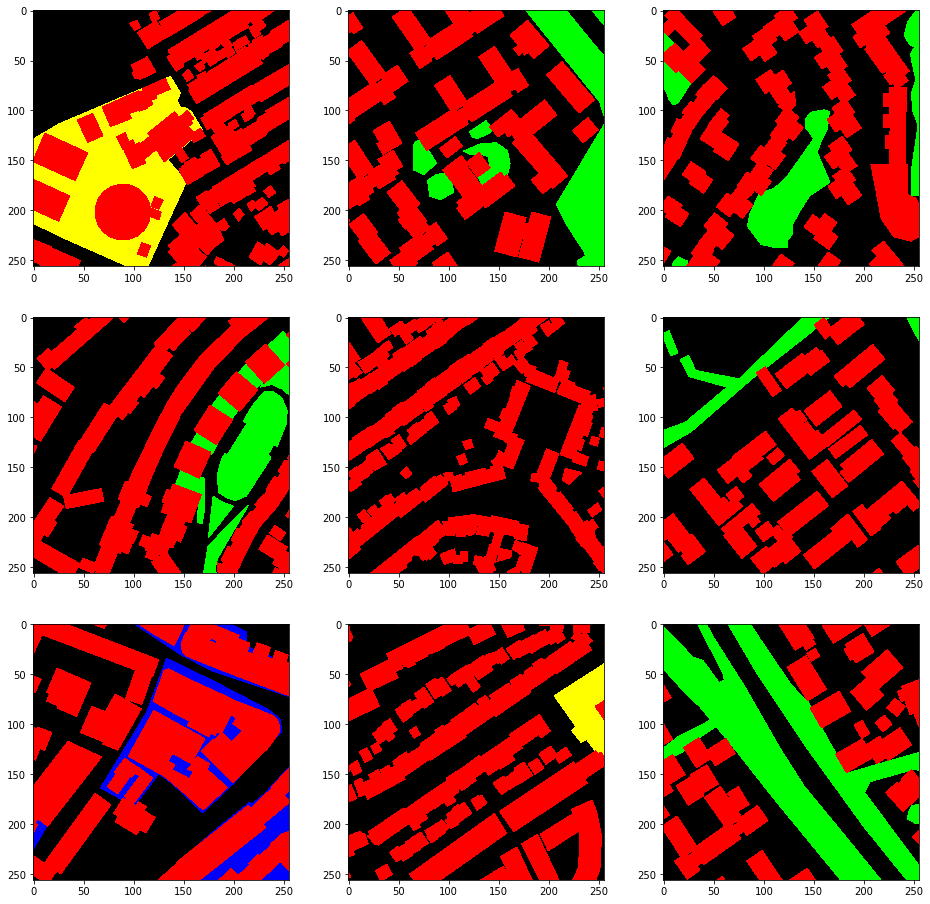

In [21]:
labels = [load_image(labels_dir + x + ".png", "RGBA") for x in files]
plot_images(labels)

# Extract mask

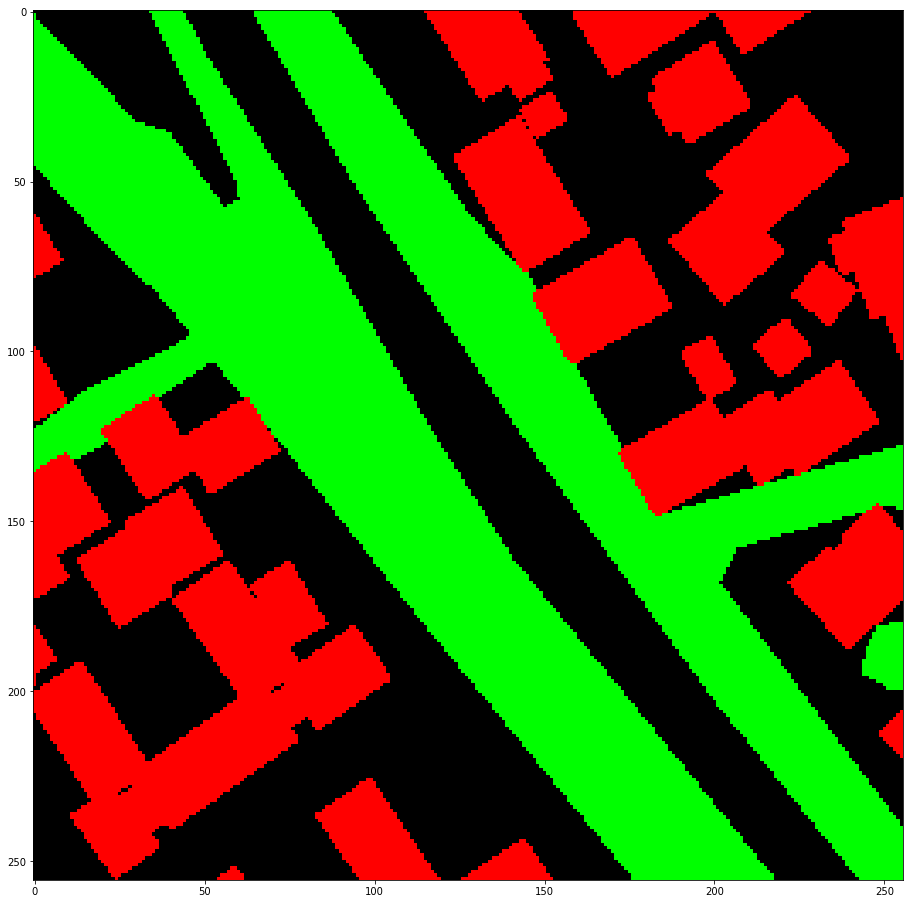

In [23]:
img = load_image(labels_dir + files[-1] + ".png")
img = img.convert("RGB")
plot_image(img)


### Unique colour counts in this mask

In [8]:
arr = np.asarray(img)
arr.shape

(256, 256, 3)

In [24]:
colours, counts = np.unique(np.array([str(x) for x in np.reshape(arr, (256*256, -1))]), return_counts=True)
for x, y in zip(colours, counts):
    print(str(x) + " =\t" + str(y))

[  0 255   0] =	20576
[0 0 0] =	28859
[255   0   0] =	16101


In [14]:
# scene labels
label_img = Image.open(labels_dir + images[0] + ".png")
label_img = label_img.convert("RGBA")
label_arr = np.array(label_img)

# set black alpha to 0, set anything else to 96
black = label_arr[:,:, 0] + label_arr[:,:, 1] + label_arr[:,:, 2] == 0
label_arr[black, 3] = 0
label_arr[np.logical_not(black), 3] = 96
label_img = Image.fromarray(label_arr, "RGBA")

# sat image + copy
sat_img = Image.open(images_dir + images[0] + ".jpg")
combined_img = sat_img.copy()

# combine label + sat image
combined_img.paste(label_img, (0, 0), label_img)

combined_arr = np.asarray(combined_img)
plt.figure(figsize = (16, 16))
#plt.imshow(combined_arr)



'RGBA'

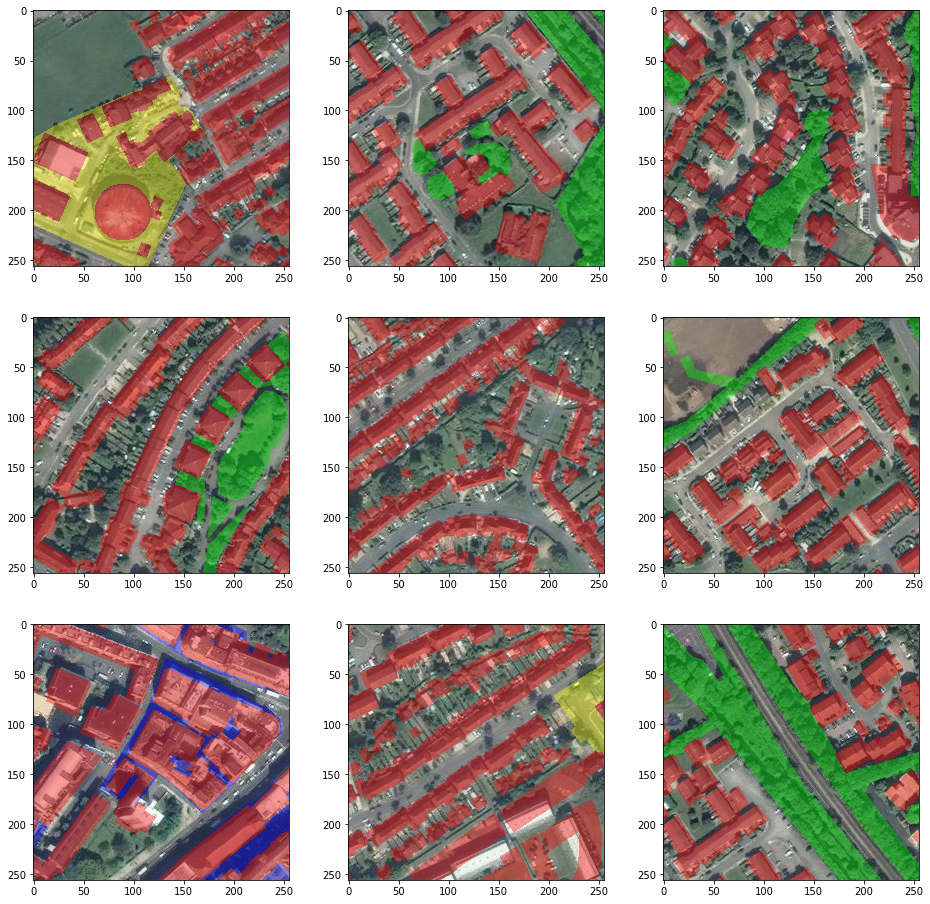

In [26]:
plot_images(combine_image(x, y) for x, y in zip(labels, images))